In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:, 2:]
y = iris.target

## Classification

Let's train our model without preprocessing the data, as Decision Trees require no feature scaling or centering:

In [4]:
tree_classifier = DecisionTreeClassifier(max_depth=2)
tree_classifier.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [5]:
export_graphviz(tree_classifier,
               out_file="iris_tree.dot",
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True
               )

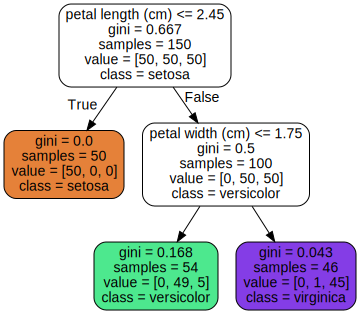

In [6]:
with open ("iris_tree.dot")  as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

The Gini score indicates the purity (entropy) of a given leaf (gini=0 if all instances it belongs to apply to one class). Note that SKLearn uses the CART algorithm for Decision Trees (binary trees only). When a leaf is pure, it cannot be split further (it has a straight and complete decision boundary).

Decision Trees are prone to overfitting as their structure can adapt almost entirely to data without setting its parameters in advance (unlike linear models). To avoid overfitting you must regularize the model by restricting its maximum depth. You can also set 'min_samples_split' the min samples a node must have bf it split, etc: increasing any'min_something' will help regularize.

## Regression

In [7]:
iris = load_iris()
X = iris.data
y = iris.target

tree_regression = DecisionTreeRegressor(max_depth=2)
tree_regression.fit(X, y)

DecisionTreeRegressor(max_depth=2)

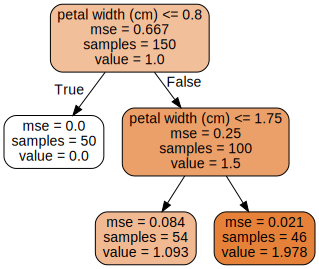

In [8]:
export_graphviz(tree_regression,
               out_file="iris_tree.dot",
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               rounded=True,
               filled=True
               )

with open ("iris_tree.dot")  as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

Now the model predicts a value for each node instead of a class and indicates the mean squared error for all instances in the node. The prediction is always the average target value for a given node. Visually, the model splits regions so that most training instances are as close as possible to each node predicted value.

Regularization works the same way as classification with 'min_something' parameters in order to avoid overfitting.

Problem with Decision Trees: instability -> decision boundaries might get unnecessarily convoluted and will overfit the training data -> one change in the training data might trigger and very different tree. Random Forests can limit this problem by averaging predictions over many trees.